This notebook contains new work.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import glob as g
import pandas as pd
from scipy.interpolate import griddata

In [18]:
SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.style.use('seaborn-v0_8')

In [19]:
#Longwave Input Read
def rrtmg_lw_input_read(nlev, file):
    temparr = np.empty(0);
    parr = np.empty(0);
    tave = np.empty(0);
    pave = np.empty(0);
    mix_ratio = np.array([[0.0 for x in range(8)]for y in range(51)]);
    
    fi = open(file, 'r')
    lines = fi.readlines()[0:]

    line7 = lines[7].split()
    #Updating pressure and temperature for top and bottom of 1st layer separately
    temparr = np.append(temparr, line7[5])
    parr = np.append(parr, line7[4])
    temparr = np.append(temparr, line7[8])
    parr = np.append(parr, line7[7])
    tave = np.append(tave, line7[1]);
    pave = np.append(pave, line7[0]);    

    for j in range(9,nlev,2):
       tmp1 = lines[j];
       tmpave = tmp1.split();
       tave = np.append(tave, tmpave[1]);
       pave = np.append(pave, tmpave[0]);
       indices = [71];
       tmp2 = [tmp1[i:j] for i,j in zip(indices, indices[1:]+[None])];
       tmp3 = np.empty([0,0])
       for val in tmp2:
        tmp3 = np.append(tmp3, val.split())
       temparr = np.append(temparr, tmp3[1])
       parr = np.append(parr, tmp3[0])

    for j in range(8, nlev, 2):
       tmp1 = lines[j]
       tmp2 = tmp1.split()
       for u in range(0,len(tmp2)):
           tmp2[u] = float(tmp2[u])
       # print(tmp2)
       for k in range(0,len(tmp2)):
         mix_ratio[(j-8)//2][k] = tmp2[k]
        
    temparr = [float(val) for val in temparr]
    parr = [float(value) for value in parr]
    tave = [float(val) for val in tave]
    pave = [float(value) for value in pave]    
    fi.close()

    return temparr, parr, tave, pave, mix_ratio

In [20]:
#Shortwave Input Read
def rrtmg_sw_input_read(nlev, file):
    temparr = np.empty(0);
    parr = np.empty(0);
    tave = np.empty(0);
    pave = np.empty(0);
    mix_ratio = np.array([[0.0 for x in range(8)]for y in range(51)]);
    
    fi = open(file, 'r')
    lines = fi.readlines()[0:]

    line8 = lines[8].split()
    #Updating pressure and temperature for top and bottom of 1st layer separately
    temparr = np.append(temparr, line8[5])
    parr = np.append(parr, line8[4])
    temparr = np.append(temparr, line8[8])
    parr = np.append(parr, line8[7])
    tave = np.append(tave, line8[1]);
    pave = np.append(pave, line8[0]);    

    for j in range(10,nlev,2):
       tmp1 = lines[j];
       tmpave = tmp1.split();
       tave = np.append(tave, tmpave[1]);
       pave = np.append(pave, tmpave[0]);
       indices = [71];
       tmp2 = [tmp1[i:j] for i,j in zip(indices, indices[1:]+[None])];
       tmp3 = np.empty([0,0])
       for val in tmp2:
        tmp3 = np.append(tmp3, val.split())
       temparr = np.append(temparr, tmp3[1])
       parr = np.append(parr, tmp3[0])

    for j in range(9, nlev, 2):
       tmp1 = lines[j]
       tmp2 = tmp1.split()
       for u in range(0,len(tmp2)):
           tmp2[u] = float(tmp2[u])
       # print(tmp2)
       for k in range(0,len(tmp2)):
         mix_ratio[(j-8)//2][k] = tmp2[k]
        
    temparr = [float(val) for val in temparr]
    parr = [float(value) for value in parr]
    tave = [float(val) for val in tave]
    pave = [float(value) for value in pave]    
    fi.close()

    return temparr, parr, tave, pave, mix_ratio

In [21]:
#Longwave Output read
def rrtmg_lw_output_read(nlev, file, string):
    lvl = np.full(nlev,np.nan);
    prs = np.full(nlev,np.nan);
    fup = np.full(nlev,np.nan);
    fdn = np.full(nlev,np.nan);
    fnt = np.full(nlev,np.nan);
    htr = np.full(nlev,np.nan);
    
    fi  = open(file,'r')
    lines = fi.readlines()[0:]
    for row in lines:
        # check if string present on a current line
        word = string
        # if found it returns index of the first occurrence of the substring
        if row.find(word) != -1:
            #print('string exists in file')
            index = lines.index(row)
            #print(index)
            lines = lines[index+3:]
            break
    
    #print(lines)
    

    for j in range(0,nlev):

        tmp1 = lines[j];
        tmp2 = tmp1.split();
        lvl[j] = tmp2[0];
        prs[j] = tmp2[1];
        fup[j] = tmp2[2];
        fdn[j] = tmp2[3];
        fnt[j] = tmp2[4];
        htr[j] = tmp2[5]; 
        
    lvl = lvl[::-1]
    prs = prs[::-1]
    fup = fup[::-1]
    fdn = fdn[::-1]
    fnt = fnt[::-1]
    htr = htr[::-1]
    
    fi.close()
    return lvl,prs,fnt,htr,string,fup,fdn

In [22]:
#Shortwave Output Read
def rrtmg_sw_output_read(nlev, file, string):
    lvl = np.full(nlev,np.nan);
    prs = np.full(nlev,np.nan);
    fup = np.full(nlev,np.nan);
    fdn = np.full(nlev,np.nan);
    fnt = np.full(nlev,np.nan);
    htr = np.full(nlev,np.nan);
    
    fi  = open(file,'r')
    lines = fi.readlines()[0:]
    for row in lines:
        # check if string present on a current line
        word = string
        # if found it returns index of the first occurrence of the substring
        if row.find(word) != -1:
            #print('string exists in file')
            index = lines.index(row)
            #print(index)
            lines = lines[index+3:]
            break
    
    #print(lines)

    for j in range(0,nlev):

        tmp1 = lines[j];
        tmp2 = tmp1.split();
        lvl[j] = tmp2[0];
        prs[j] = tmp2[1];
        fup[j] = tmp2[2];
        fdn[j] = tmp2[5];
        fnt[j] = tmp2[6];
        htr[j] = tmp2[7]; 
        
    lvl = lvl[::-1]
    prs = prs[::-1]
    fup = fup[::-1]
    fdn = fdn[::-1]
    fnt = fnt[::-1]
    htr = htr[::-1]
    
    fi.close()
    return lvl,prs,fnt,htr,string,fup,fdn

In [37]:
def return_bands():
    bands = np.array(['10.0 -  350.0', '350.0 -  500.0', '500.0 -  630.0', '630.0 -  700.0', '700.0 -  820.0','820.0 -  980.0', '980.0 - 1080.0', '1080.0 - 1180.0', '1180.0 - 1390.0', '1390.0 - 1480.0', '1480.0 - 1800.0',  '1800.0 - 2080.0', '2080.0 - 2250.0', '2250.0 - 2380.0', '2380.0 - 2600.0', '2600.0 - 3250.0', '10.0 - 3250.0'])
    return bands

def return_bands_sw():
    bands = np.array(['820. -  2600.', '2600. -  3250.', '3250. -  4000.', '4000. -  4650.', '4650. -  5150.','5150. -  6150.', '6150. -  7700.', '7700. -  8050.', '8050. - 12850.', '12850. - 16000.', '16000. - 22650.',  '22650. - 29000.', '29000. - 38000.', '38000. - 50000.', '820. - 50000.'])
    return bands

In [40]:
file = sorted(g.glob('output_rrtm_MLS-clr*'))
print(file)

finput = sorted(g.glob('input_rrtm_MLS-clr*'))
print(finput)

['output_rrtm_MLS-clr', 'output_rrtm_MLS-clr-double', 'output_rrtm_MLS-clr-quadruple', 'output_rrtm_MLS-clr-sw', 'output_rrtm_MLS-clr-sw-double', 'output_rrtm_MLS-clr-sw-quadruple']
['input_rrtm_MLS-clr', 'input_rrtm_MLS-clr-double', 'input_rrtm_MLS-clr-quadruple', 'input_rrtm_MLS-clr-sw', 'input_rrtm_MLS-clr-sw-double', 'input_rrtm_MLS-clr-sw-quadruple']


In [41]:
input_mls_lw = rrtmg_lw_input_read(109, finput[0])
output_mls_lw = rrtmg_lw_output_read(51,file[0],return_bands()[16]) #Midlattitude summer sky, clear conditions, 51 layers

input_mls_sw = rrtmg_sw_input_read(110, finput[3])
output_mls_sw = rrtmg_sw_output_read(51,file[3],return_bands_sw()[14]) #Midlattitude summer sky, clear conditions, 51 layers

In [42]:
LW_htr = output_mls_lw[3]
SW_htr = output_mls_sw[3]
Dyn_cool = LW_htr+SW_htr
print(Dyn_cool)

[ 4.513300e-01  3.933000e-01  2.711300e-01  1.040600e-01  2.247000e-02
  1.750000e-03 -2.514000e-02 -8.993000e-02 -1.915600e-01 -2.756300e-01
 -4.026000e-01 -7.403800e-01 -1.007110e+00 -7.884900e-01 -3.341800e-01
  3.100600e-01  4.005600e-01  4.011400e-01  4.247500e-01  4.191900e-01
  4.906500e-01  5.946000e-01  6.428800e-01  7.263100e-01  8.455200e-01
  1.111990e+00  1.429010e+00  1.726060e+00  1.998010e+00  2.285830e+00
  2.920000e+00  3.867990e+00  5.618210e+00  7.880610e+00  1.066269e+01
  1.341031e+01  1.499568e+01  1.443469e+01  1.213112e+01  8.669890e+00
  8.300240e+00  7.584860e+00  6.623270e+00  6.049550e+00  5.259660e+00
  4.269470e+00  3.947440e+00  3.995580e+00  4.474680e+00 -7.875350e+00
  0.000000e+00]


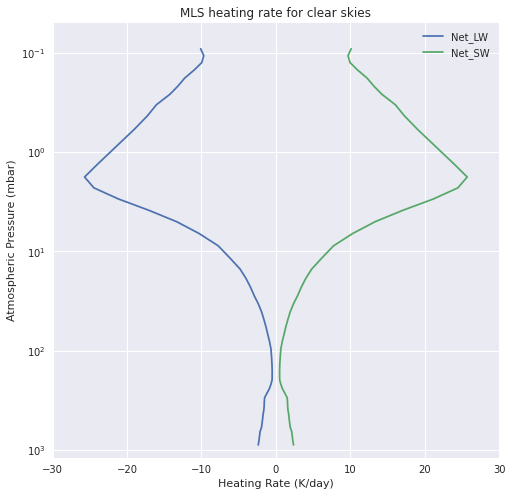

In [43]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(output_mls_lw[3][:-2]-Dyn_cool[:-2], output_mls_lw[1][:-2], label='Net_LW')
# ax.plot(output_51l[3][:-2]-output_noco2[3][:-2], output_51l[1][:-2], label='CO2_LW')
# ax.plot(output_51l[3][:-2]-output_noh2o[3][:-2], output_51l[1][:-2], label='H2O_LW')
# ax.plot(output_51l[3][:-2]-output_noo3[3][:-2], output_51l[1][:-2], label='O3_LW')
ax.plot(output_mls_sw[3][:-2], output_mls_sw[1][:-2], label='Net_SW')
# ax.plot(output_mls_sw[3][:-2]-output_noco2_sw[3][:-2], output_mls_sw[1][:-2], label='CO2_SW')
# ax.plot(output_mls_sw[3][:-2]-output_noh2o_sw[3][:-2], output_mls_sw[1][:-2], label='H2O_SW')
# ax.plot(output_mls_sw[3][:-2]-output_noo3_sw[3][:-2], output_mls_sw[1][:-2], label='O3_SW')
ax.set_xlabel('Heating Rate (K/day)')
ax.set_ylabel('Atmospheric Pressure (mbar)')
ax.set_yscale('log')
ax.set_xlim(-30,30)
ax.set_ylim(1200,0.05)
ax.legend()
ax.set_title('MLS heating rate for clear skies')
plt.savefig('LW_SW.pdf' , bbox_inches='tight')

In [48]:
input_mls_lw_double = rrtmg_lw_input_read(109, finput[1])
output_mls_lw_double = rrtmg_lw_output_read(51,file[1],return_bands()[16]) #Midlattitude summer sky, clear conditions, 51 layers

input_mls_sw_double = rrtmg_sw_input_read(110, finput[4])
output_mls_sw_double = rrtmg_sw_output_read(51,file[4],return_bands_sw()[14]) #Midlattitude summer sky, clear conditions, 51 layers

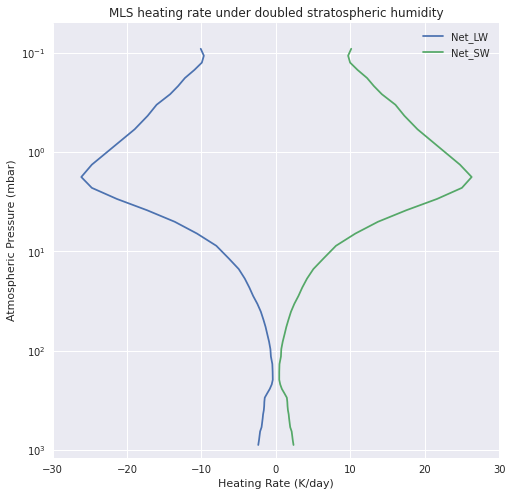

In [49]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(output_mls_lw_double[3][:-2]-Dyn_cool[:-2], output_mls_lw_double[1][:-2], label='Net_LW')
ax.plot(output_mls_sw_double[3][:-2], output_mls_sw_double[1][:-2], label='Net_SW')
ax.set_xlabel('Heating Rate (K/day)')
ax.set_ylabel('Atmospheric Pressure (mbar)')
ax.set_yscale('log')
ax.set_xlim(-30,30)
ax.set_ylim(1200,0.05)
ax.legend()
ax.set_title('MLS heating rate under doubled stratospheric humidity')
plt.savefig('LW_SW_double.pdf' , bbox_inches='tight')

In [50]:
input_mls_lw_quadruple = rrtmg_lw_input_read(109, finput[2])
output_mls_lw_quadruple = rrtmg_lw_output_read(51,file[2],return_bands()[16]) #Midlattitude summer sky, clear conditions, 51 layers

input_mls_sw_quadruple = rrtmg_sw_input_read(110, finput[5])
output_mls_sw_quadruple = rrtmg_sw_output_read(51,file[5],return_bands_sw()[14]) #Midlattitude summer sky, clear conditions, 51 layers

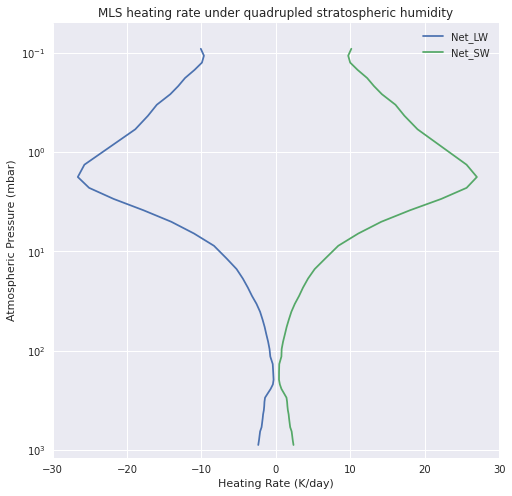

In [52]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(output_mls_lw_quadruple[3][:-2]-Dyn_cool[:-2], output_mls_lw_quadruple[1][:-2], label='Net_LW')
ax.plot(output_mls_sw_quadruple[3][:-2], output_mls_sw_quadruple[1][:-2], label='Net_SW')
ax.set_xlabel('Heating Rate (K/day)')
ax.set_ylabel('Atmospheric Pressure (mbar)')
ax.set_yscale('log')
ax.set_xlim(-30,30)
ax.set_ylim(1200,0.05)
ax.legend()
ax.set_title('MLS heating rate under quadrupled stratospheric humidity')
plt.savefig('LW_SW_double.pdf' , bbox_inches='tight')

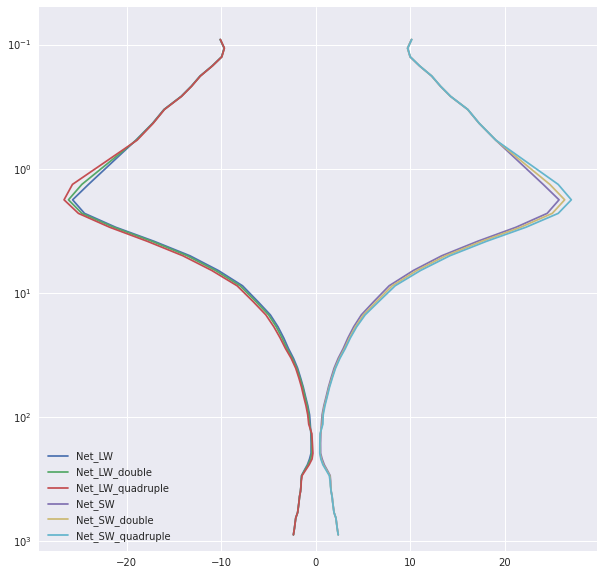

In [63]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(output_mls_lw[3][:-2]-Dyn_cool[:-2], output_mls_lw_quadruple[1][:-2], label='Net_LW')
ax.plot(output_mls_lw_double[3][:-2]-Dyn_cool[:-2], output_mls_lw_quadruple[1][:-2], label='Net_LW_double')
ax.plot(output_mls_lw_quadruple[3][:-2]-Dyn_cool[:-2], output_mls_lw_quadruple[1][:-2], label='Net_LW_quadruple')
ax.plot(output_mls_sw[3][:-2], output_mls_sw_quadruple[1][:-2], label='Net_SW')
ax.plot(output_mls_sw_double[3][:-2], output_mls_sw_quadruple[1][:-2], label='Net_SW_double')
ax.plot(output_mls_sw_quadruple[3][:-2], output_mls_sw_quadruple[1][:-2], label='Net_SW_quadruple')
ax.set_yscale('log')
ax.set_ylim(1200,0.05)
ax.legend()